In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("maaslar.csv")
data

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [3]:
X=data.iloc[:,1:2].values
y=data.iloc[:,2:].values
# VERİLER ZATEN AZ OLDUĞU İÇİN TAMAMI EĞİTİLECEK, BÖLÜNME YAPILMAYACAK.

In [4]:
# NORMAL LINEER REGRESYON
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)
y_pred=lr.predict(X)

In [5]:
import matplotlib.pyplot as plt

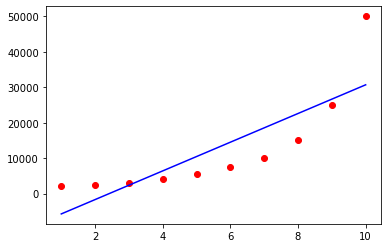

In [6]:
plt.scatter(X,y,color='red')
plt.plot(X,y_pred,color='blue')

In [7]:
# POLINOM REGRESYON

In [8]:
from IPython.display import Image
Image(filename = "pr.png", width = 700, height = 500)

In [9]:
# yukarıdaki formüle göre X^0=1 olacağından ilk sütun tamamen 1, öteki sütunlar X'in derecesine göre artmaktadır.
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2) # 2.dereceden
x_pr=pr.fit_transform(X)
x_pr

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

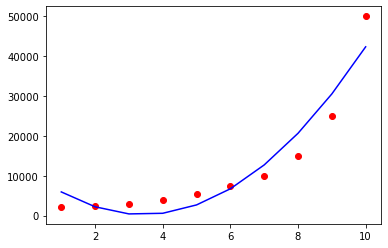

In [10]:
lr2=LinearRegression()
lr2.fit(x_pr,y)
plt.scatter(X,y,color='red')
plt.plot(X,lr2.predict(x_pr),color='blue')
# Doğrusal regresyon kullanılıyor fakat veriyi lr2 objesine vermeden önce
# yukarıda tanımlanan x_pr tipine yani polinoma dönüştürüyoruz.

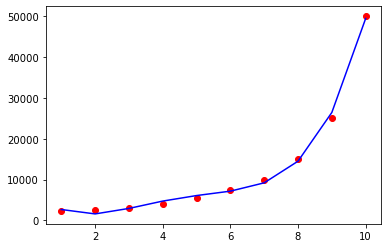

In [11]:
# dereceyi=4 yaptığımızda model çok daha başarılı.
pr2=PolynomialFeatures(degree=4) # 4.dereceden
x_pr2=pr2.fit_transform(X)
lr3=LinearRegression()
lr3.fit(x_pr2,y)
plt.scatter(X,y,color='red')
plt.plot(X,lr3.predict(x_pr2),color='blue')

In [18]:
# tahminler
print(lr.predict([[11]])) # lineer regression
print(lr.predict([[6.6]])) # lineer regression
print(lr2.predict(pr.fit_transform([[11]]))) # derecesi=2 olan polinom regresyon
print(lr2.predict(pr.fit_transform([[6.6]]))) # derecesi=2 olan polinom regresyon
print(lr3.predict(pr2.fit_transform([[11]]))) # derecesi=4 olan polinom regresyon
print(lr3.predict(pr2.fit_transform([[6.6]]))) # derecesi=4 olan polinom regresyon
# TAHMİN YAPARKENDE ÖNCE VERİYİ POLİNOM OLACAK ŞEKİLDE EĞİTİM UYGULADIKTAN SONRA (pr2.fit_transform([[6.6]])) TAHMİN YAPIYORUZ!!

[[34716.66666667]]
[[16923.33333333]]
[[56091.66666667]]
[[10083.33333333]]
[[89041.66666665]]
[[8146.9948718]]


In [14]:
data

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000
